In [1]:
#RANSACREGRESSOR

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('MSFT.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [4]:
data.shape

(9083, 7)

In [5]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
del data['Date']
del data['Adj Close']

In [7]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [8]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
df=data.dropna()

In [10]:
df.tail()

,Open,High,Low,Close,Volume
9078,295.369995,301.000000,292.730011,300.429993,43317000
9079,298.890015,300.140015,294.899994,299.160004,28351200
9080,299.799988,305.000000,298.769989,304.059998,27599700
9081,300.510010,303.230011,297.720001,299.489990,25715400
9082,299.140015,304.200012,298.320007,304.100006,24446900


In [11]:
x=df.drop(labels='Close',axis=1)
y=df.loc[:,'Close']


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)
print("NUMBER OF TRAIN DATASET:",len(x_train))
print("NUMBER OF TEST DATASET:",len(x_test))
print("TOTAL NUMBER OF DATASET:",len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET: 7266
NUMBER OF TEST DATASET: 1817
TOTAL NUMBER OF DATASET: 9083


In [13]:
print("NUMBER OF TRAIN DATASET:",len(y_train))
print("NUMBER OF TEST DATASET:",len(y_test))
print("TOTAL NUMBER OF DATASET:",len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET: 7266
NUMBER OF TEST DATASET: 1817
TOTAL NUMBER OF DATASET: 9083


In [14]:
from sklearn.linear_model import RANSACRegressor

In [15]:
RSR=RANSACRegressor()
RSR.fit(x_train,y_train)

RANSACRegressor()

In [16]:
predicted=RSR.predict(x_test)

In [17]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predicted)
print("THE R2 SCORE OF RANSACREGRESSOR IS :",R2)


THE R2 SCORE OF RANSACREGRESSOR IS : 0.9999302853351566


In [18]:
from sklearn.metrics import rand_score
RAND = rand_score(y_test,predicted)
print("THE ACCURACY SCORE OF RANSACREGRESSOR IS :",RAND*100)

THE ACCURACY SCORE OF RANSACREGRESSOR IS : 99.9764218989039


In [19]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test,predicted)
print("THE EXPLAINED VARIENCE SCORE OF RANSACREGRESSORIS :",EVS)

THE EXPLAINED VARIENCE SCORE OF RANSACREGRESSORIS : 0.9999302915167895


In [20]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,predicted)
print("THE MEAN SQUARED ERROR SCORE OF RANSACREGRESSORIS :",MSE)

THE MEAN SQUARED ERROR SCORE OF RANSACREGRESSORIS : 0.25063947020834054


In [21]:
from sklearn.metrics import median_absolute_error
MAE = median_absolute_error(y_test,predicted)
print("THE MEAN ABSOLUTE ERROR SCORE OF RANSACREGRESSOR IS :",MAE)

THE MEAN ABSOLUTE ERROR SCORE OF RANSACREGRESSOR IS : 0.07980337546172844


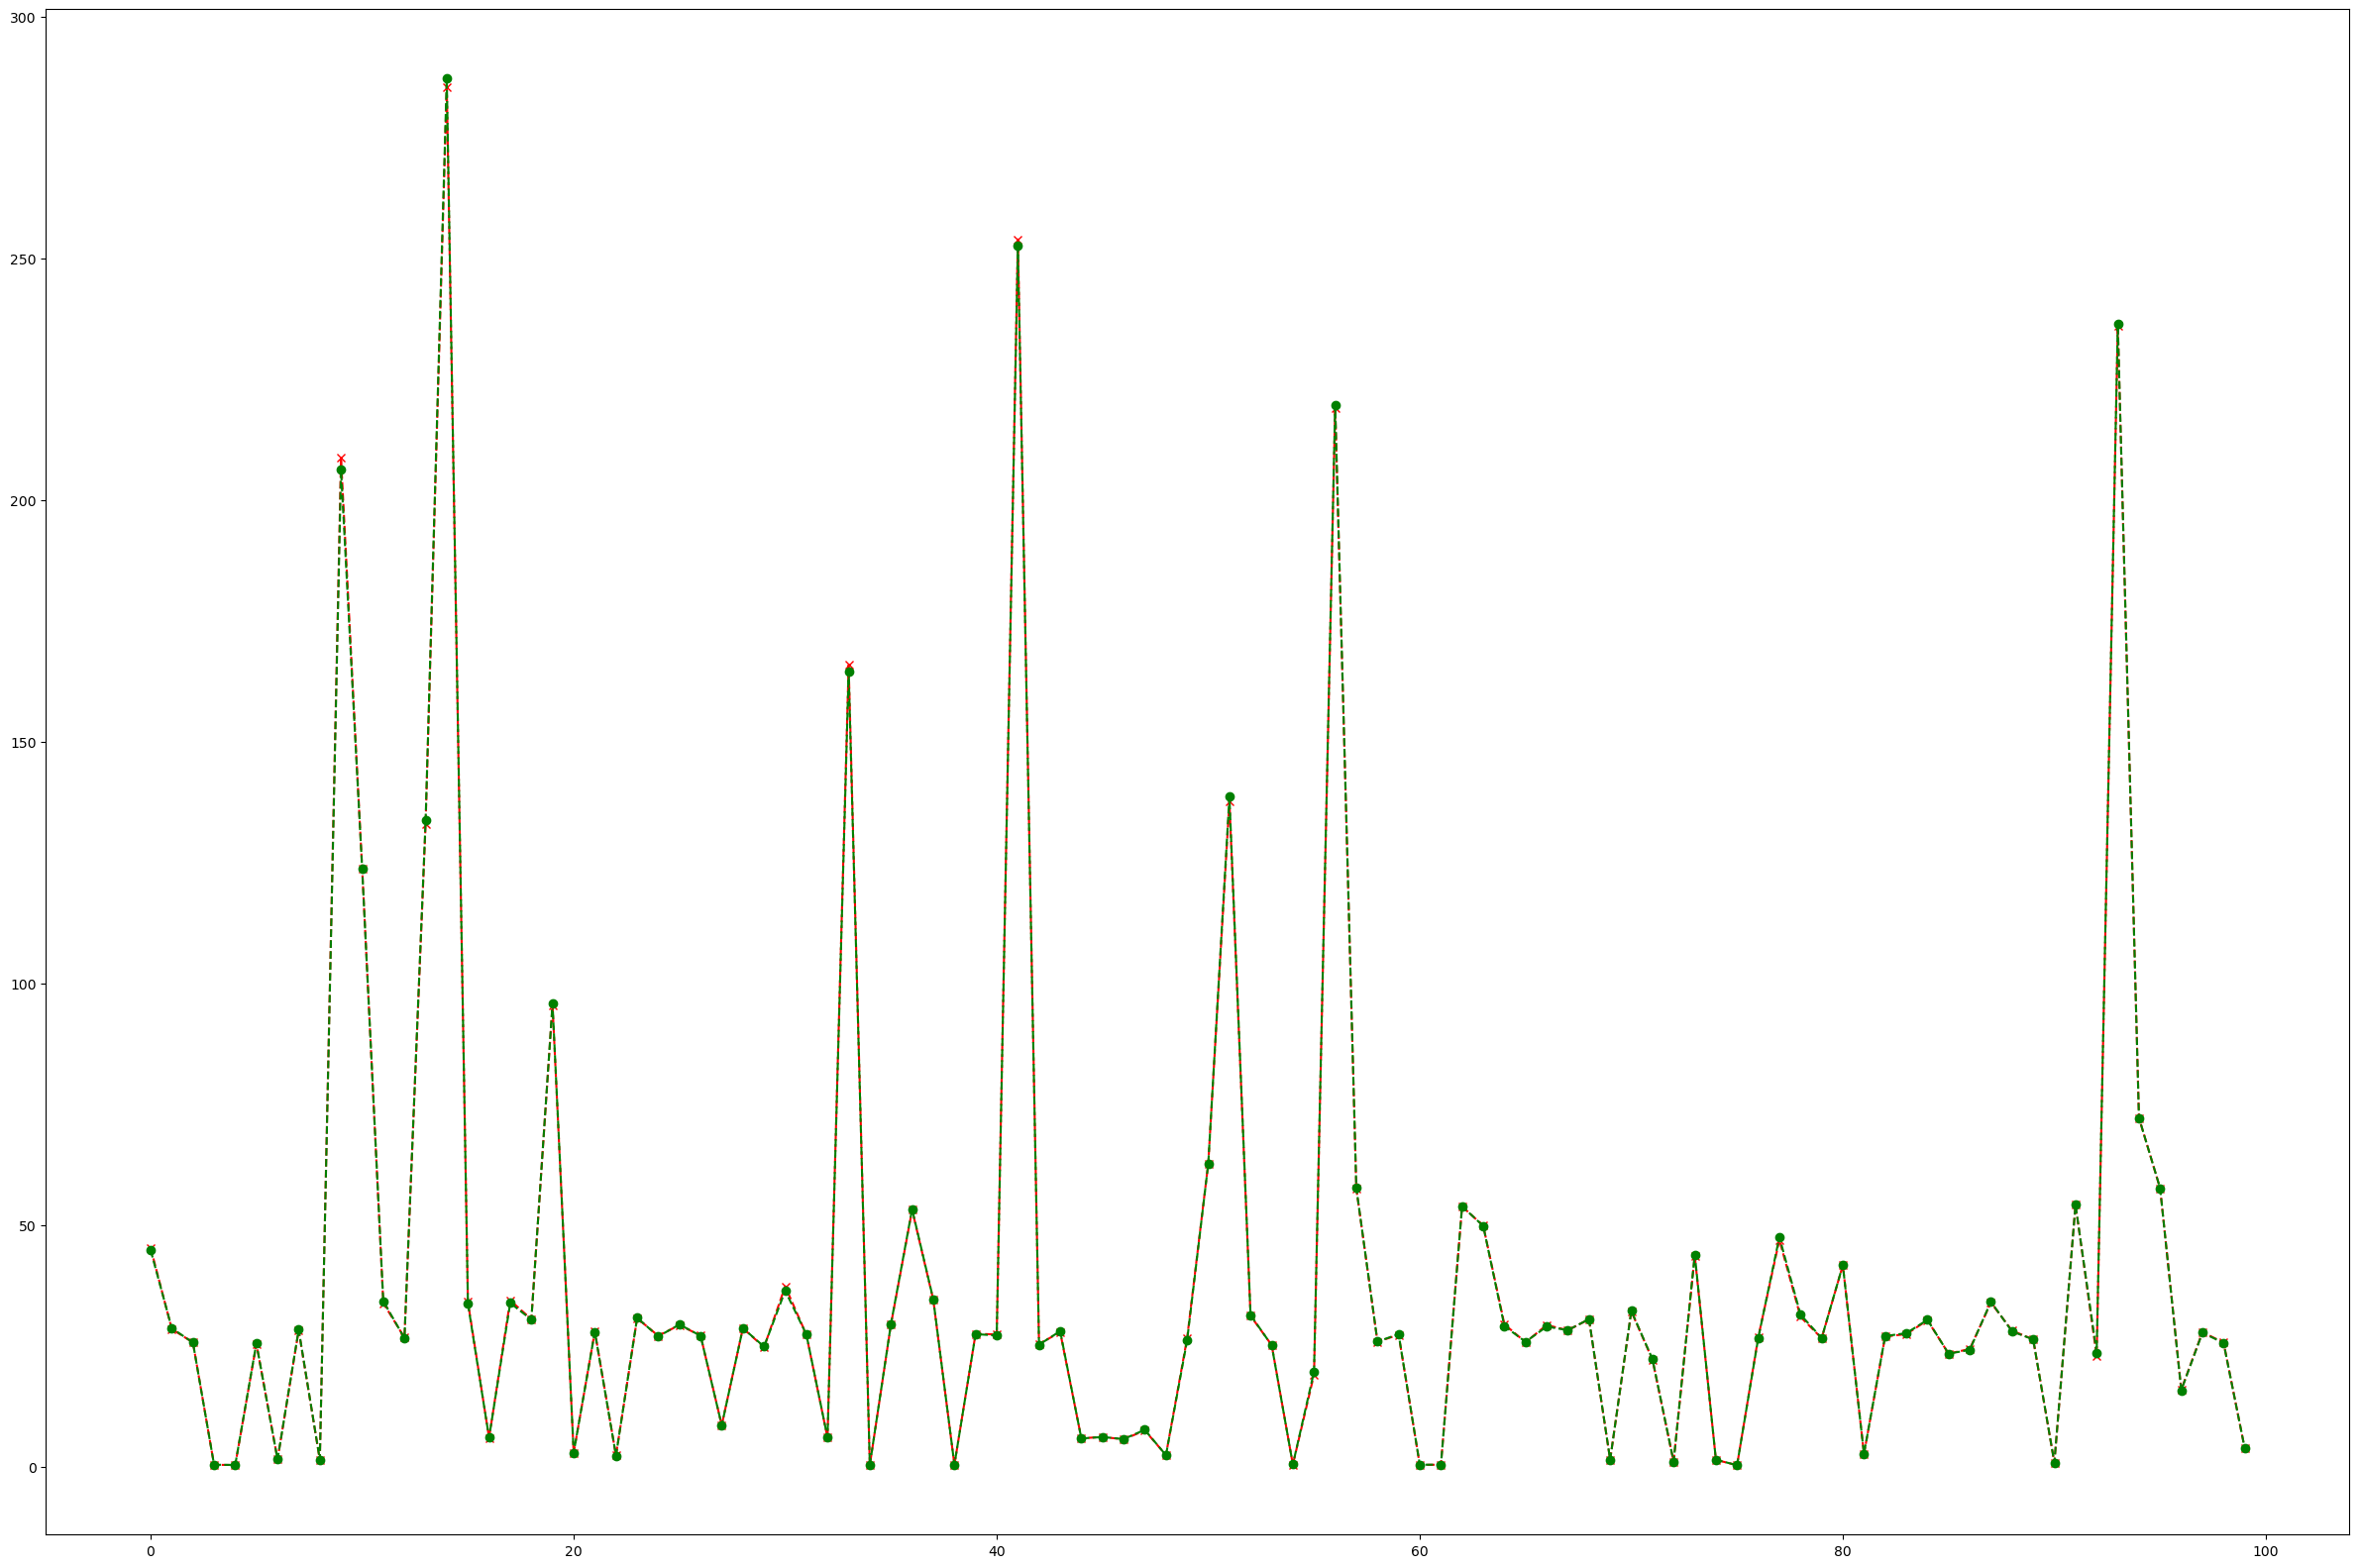

In [22]:
import matplotlib.pyplot as plt
df2=pd.DataFrame()
df2['y_test']=y_test
df2['predicted']=predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(30,20))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [23]:
import joblib
joblib.dump(RSR,'Microsoft1.pkl')


['Microsoft1.pkl']